In [137]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
## USD_INR Historical Data Data Import

data = pd.read_csv("/Users/hariprasadrajendran/Documents/Rutgers/Regression and Time Series Analysis/project/USD_INR_Historical_Data.csv",sep=',')

In [139]:
data.shape

(2608, 6)

In [140]:
## 6 variables - 5 input and 1 output variable (price)
## 2608 observations
## Data from Jan 01, 2010 to Dec 31, 2019

In [141]:
data.head()

,Date,Price,Open,High,Low,Change %
0,"Dec 31, 2019",71.35,71.295,71.385,71.225,0.06%
1,"Dec 30, 2019",71.31,71.340,71.427,71.290,-0.18%
2,"Dec 27, 2019",71.44,71.315,71.505,71.175,0.21%
3,"Dec 26, 2019",71.29,71.270,71.348,71.225,0.01%
4,"Dec 25, 2019",71.28,71.280,71.280,71.280,0.01%


In [142]:
data.tail()

,Date,Price,Open,High,Low,Change %
2603,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10%
2604,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10%
2605,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19%
2606,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69%
2607,"Jan 01, 2010",46.615,46.610,46.677,46.590,0.44%


In [143]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [144]:
data.isnull().values.any()

False

In [100]:
ProfileReport(data)

In [145]:
data_new = data.iloc[::-1].reset_index(drop=True)

In [146]:
data_new.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

In [147]:
data_new.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2010",46.615,46.610,46.677,46.590,0.44%
1,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69%
2,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19%
3,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10%
4,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10%


In [148]:
data_new['Change %'] = data_new['Change %'].replace({'%':''}, regex=True)

In [149]:
data_new['Change %'] = data_new['Change %'].astype(float)

In [150]:
"""
Lag features
To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

"""

#data_new['Lag_1'] = data_new['Change %'].shift()
data_new['Lag_1'] = data_new['Price'].shift()
data_new = data_new.dropna()
data_new.head()

,Date,Price,Open,High,Low,Change %,Lag_1
1,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69,46.615
2,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19,46.295
3,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10,46.205
4,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10,45.695
5,"Jan 08, 2010",45.470,45.680,45.900,45.470,-0.39,45.650


In [151]:
## Test Train Split

In [152]:
data_new.iloc[2085,:]

Date        Jan 01, 2018
Price              63.68
Open              63.855
High              63.865
Low               63.635
Change %           -0.25
Lag_1              63.84
Name: 2086, dtype: object

In [153]:
## All data till Jan 01 2018 will be train data

train = data_new.iloc[:2084,:]

In [154]:
train.tail()

,Date,Price,Open,High,Low,Change %,Lag_1
2080,"Dec 22, 2017",64.02,64.060,64.090,64.020,0.00,64.02
2081,"Dec 25, 2017",64.02,64.020,64.020,64.020,0.00,64.02
2082,"Dec 26, 2017",64.05,64.040,64.125,64.028,0.05,64.02
2083,"Dec 27, 2017",64.12,64.075,64.185,64.075,0.11,64.05
2084,"Dec 28, 2017",64.08,64.130,64.280,64.078,-0.06,64.12


In [155]:
test = data_new.iloc[2084:,:]

In [156]:
test.head()

,Date,Price,Open,High,Low,Change %,Lag_1
2085,"Dec 29, 2017",63.840,64.055,64.070,63.790,-0.37,64.080
2086,"Jan 01, 2018",63.680,63.855,63.865,63.635,-0.25,63.840
2087,"Jan 02, 2018",63.460,63.700,63.770,63.440,-0.35,63.680
2088,"Jan 03, 2018",63.505,63.555,63.575,63.450,0.07,63.460
2089,"Jan 04, 2018",63.400,63.595,63.615,63.365,-0.17,63.505


In [157]:
x_train = train.loc[:,['Lag_1']]
x_test = test.loc[:,['Lag_1']]

#y_train = train.loc[:,'Change %']
#y_test = test.loc[:,'Change %']

y_train = train.loc[:,'Price']
y_test = test.loc[:,'Price']

In [158]:
x_train.head()

,Lag_1
1,46.615
2,46.295
3,46.205
4,45.695
5,45.650


In [212]:
## Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [213]:
model.coef_

array([0.99911418])

In [214]:
model.intercept_

0.05949893398091177

In [162]:
y_pred = model.predict(x_test)

In [163]:
## combine test data and predictions in one dataframe

res = y_test.to_frame()
res['Predictions'] = y_pred
res.head()

,Price,Predictions
2085,63.840,64.082735
2086,63.680,63.842948
2087,63.460,63.683090
2088,63.505,63.463285
2089,63.400,63.508245


In [164]:
res.tail()

,Price,Predictions
2603,71.28,71.266366
2604,71.29,71.276358
2605,71.44,71.286349
2606,71.31,71.436216
2607,71.35,71.306331


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

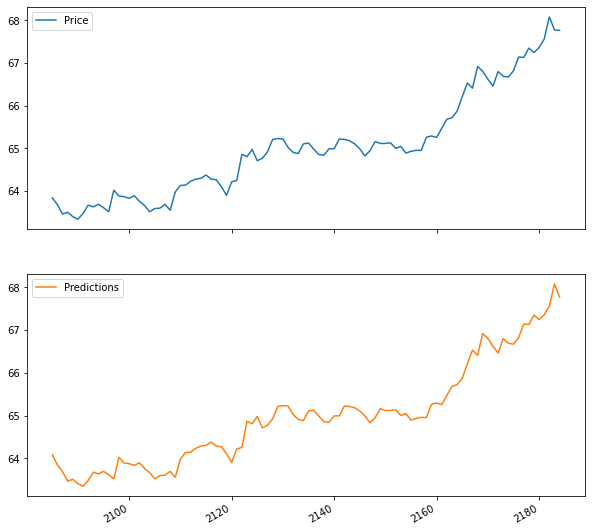

In [165]:
# Plot the first 20 predictions vs the true values
res[:100].plot(subplots=True, figsize = (10, 10))

In [166]:
## Calculate mean squared error for test data

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, model.predict(x_train))
print("Mean Squared error of the predictions made on train data: ", mse_train)

mse_test = mean_squared_error(y_test,y_pred)
print("Mean Squared error of the predictions made on test data: ", mse_test)

Mean Squared error of the predictions made on train data:  0.07494891303692658
Mean Squared error of the predictions made on test data:  0.07283556239023234


In [167]:
## Time Series Analysis

In [168]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot

In [169]:
data_new.head()

,Date,Price,Open,High,Low,Change %,Lag_1
1,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69,46.615
2,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19,46.295
3,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10,46.205
4,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10,45.695
5,"Jan 08, 2010",45.470,45.680,45.900,45.470,-0.39,45.650


<AxesSubplot:title={'center':'INR'}>

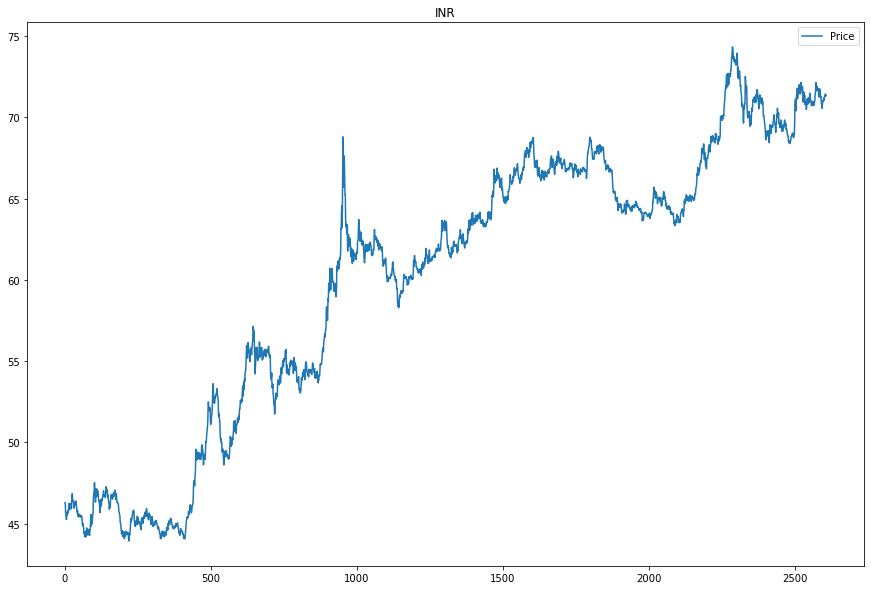

In [170]:
data_new.Price.plot(figsize=[15,10],title='INR',legend=True)

In [171]:
data_1 = data_new[['Date','Price']]

In [172]:
data_1.dtypes

Date      object
Price    float64
dtype: object

In [173]:
from datetime import datetime

def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert, '%b %d, %Y').strftime('%m/%d/%Y')

data_1['Date'] = data_1['Date'].apply(date_convert)

<ipython-input-173-cc6d2859085f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Date'] = data_1['Date'].apply(date_convert)


In [174]:
data_1.dtypes

Date      object
Price    float64
dtype: object

In [175]:
data_1 = data_1.set_index(['Date'])

In [176]:
data_1

,Price
Date,
01/04/2010,46.295
01/05/2010,46.205
01/06/2010,45.695
01/07/2010,45.650
01/08/2010,45.470
...,...
12/25/2019,71.280
12/26/2019,71.290
12/27/2019,71.440


<AxesSubplot:xlabel='Date'>

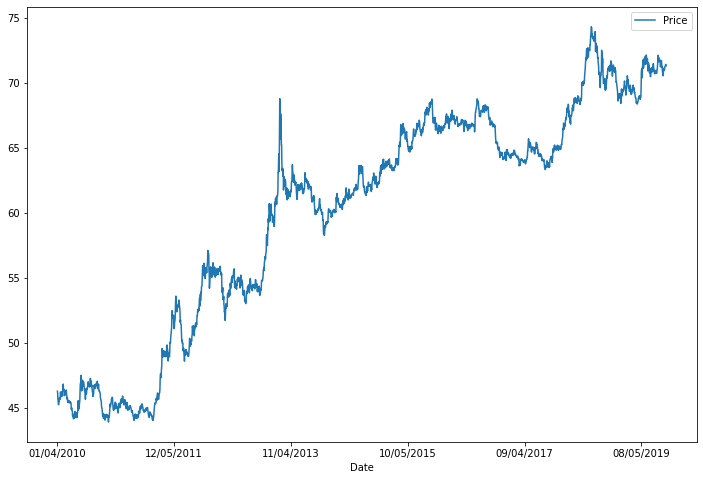

In [177]:
## Plot

data_1.plot(figsize=(12,8))

In [178]:
## We can see an upward trend meaning the conversion rate has increased over last 9 years

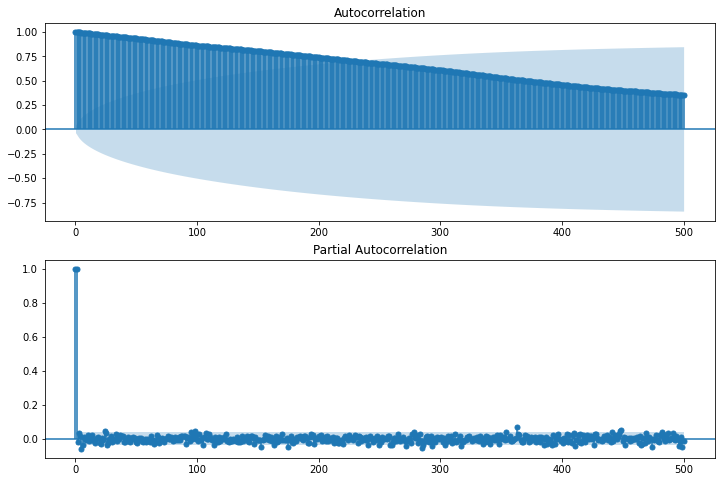

In [179]:
## ACF and PACF plots

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_1.values.squeeze(), lags=500, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_1, lags=500, ax=ax2)

In [ ]:
## p = 1
#If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, 
#then use one autoregressive (p)parameter
## q =1
# If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, 
#then use one autoregressive (p) and one moving average (q) parameter.
"""
Stationarity means that the time series does not have a trend, has a constant variance, 
a constant autocorrelation pattern, and no seasonal pattern. The autocorrelation function declines to 
near zero rapidly for a stationary time series. In contrast, the ACF drops slowly for a non-stationary time series.
"""

## This times series is non-stationary

In [67]:
## Durbin -Watson stats

sm.stats.durbin_watson(data_1)

#Positive serial correlation is associated with DW values below 2

array([2.025923e-05])

In [215]:
## First order differencing to make time series data stationary

data_1_diff = data_1 - data_1.shift(1)
data_1_diff = data_1_diff.dropna()
train_1 = data_1_diff.iloc[:2085,:]
train_1.dropna()

,Price
Date,
01/05/2010,-0.090
01/06/2010,-0.510
01/07/2010,-0.045
01/08/2010,-0.180
01/11/2010,-0.210
...,...
12/26/2017,0.030
12/27/2017,0.070
12/28/2017,-0.040


In [205]:
# Train and test split

train = data_1.iloc[:2085,:]
train.dropna()



,Price
Date,
01/04/2010,46.295
01/05/2010,46.205
01/06/2010,45.695
01/07/2010,45.650
01/08/2010,45.470
...,...
12/25/2017,64.020
12/26/2017,64.050
12/27/2017,64.120


In [181]:
test = data_1.iloc[2086:,:]
test.head()

,Price
Date,
01/02/2018,63.460
01/03/2018,63.505
01/04/2018,63.400
01/05/2018,63.340
01/08/2018,63.475


In [206]:
train.shape

(2085, 1)

In [216]:
## ARMA model (p=1,q=0)


model_diff = sm.tsa.ARMA(train_1['Price'], (1,0)).fit()
print(model_diff.params)

const          0.008334
ar.L1.Price    0.030874
dtype: float64


/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [219]:
model_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2085
Model:                     ARMA(1, 0)   Log Likelihood                -256.516
Method:                       css-mle   S.D. of innovations              0.274
Date:                Thu, 09 Dec 2021   AIC                            519.031
Time:                        14:12:52   BIC                            535.959
Sample:                    01-05-2010   HQIC                           525.234
                         - 01-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0083      0.006      1.348      0.178      -0.004       0.020
ar.L1.Price     0.0309      0.022      1.411      0.158      -0.012       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           32.3899           +0.0000j           32.3899            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Exchange Rate Forecast'}>

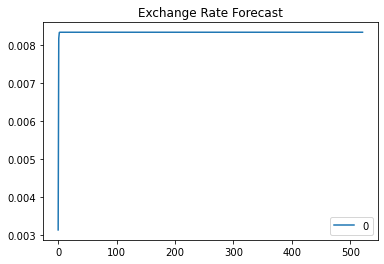

In [220]:
# Plot the 522 Day exchange rate Forecast
pd.DataFrame(model_diff.forecast(steps=522)[0]).plot(title="Exchange Rate Forecast")

In [217]:
plt.plot(model_diff.fittedvalues)

Error in callback <function flush_figures at 0x7fe6f2ee6040> (for post_execute):


KeyboardInterrupt: 

In [183]:
## ARMA model (p=1,q=0)

model_1 = sm.tsa.ARMA(train['Price'], (1,0)).fit()
print(model_1.params)

const          55.997039
ar.L1.Price     0.999483
dtype: float64


/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [184]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2085
Model:                     ARMA(1, 0)   Log Likelihood                -261.991
Method:                       css-mle   S.D. of innovations              0.274
Date:                Thu, 09 Dec 2021   AIC                            529.983
Time:                        11:32:09   BIC                            546.911
Sample:                    01-04-2010   HQIC                           536.185
                         - 12-29-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.9970      6.890      8.127      0.000      42.492      69.502
ar.L1.Price     0.9995      0.001   1926.275      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
-----------------------------------------------------------------------------
"""

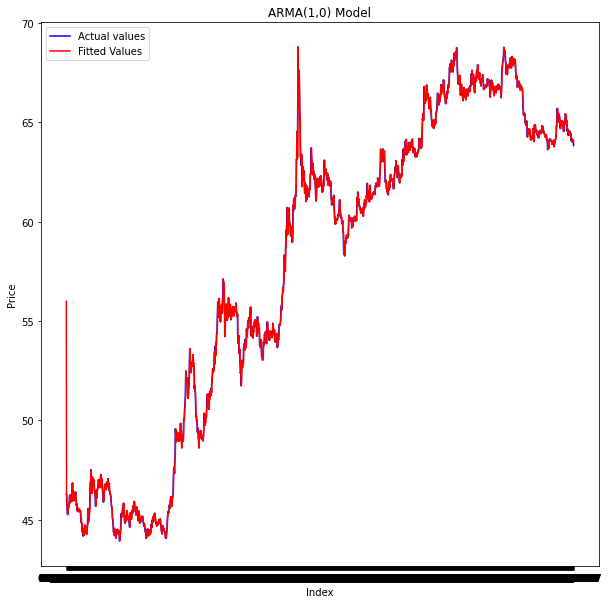

In [185]:
## Plots

plt.figure(figsize=(10,10))
plt.plot(train['Price'].to_numpy(),color='b')
plt.plot(model_1.fittedvalues, color='r')
plt.legend(['Actual values', 'Fitted Values'])
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("ARMA(1,0) Model")
plt.show()

<AxesSubplot:title={'center':'Exchange Rate Forecast'}>

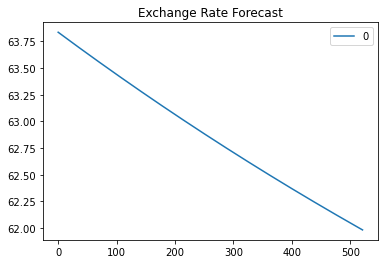

In [186]:
# Plot the 522 Day exchange rate Forecast
pd.DataFrame(model_1.forecast(steps=522)[0]).plot(title="Exchange Rate Forecast")

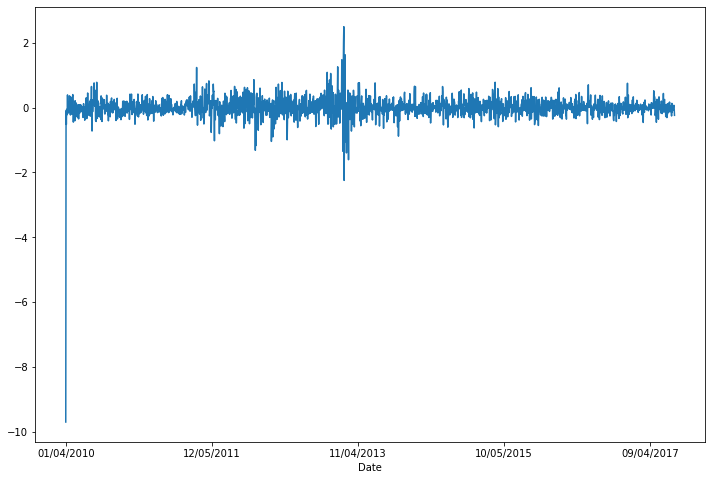

In [187]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = model_1.resid.plot(ax=ax);

In [193]:
pred_1= model_1.forecast(steps=521)[0]
a = pd.DataFrame(pred_1)

from sklearn.metrics import mean_squared_error

mse_model_1 = (mean_squared_error(test['Price'],pred_1))
mse_model_1

51.48682048456528

In [191]:
mse_model_1 = (mean_squared_error(train['Price'],model_1.fittedvalues))
mse_model_1

0.12012968279200867

In [56]:
## ARMA model (p=1,q=1)

model_2 = sm.tsa.ARMA(train['Price'], (1,1)).fit()
print(model_2.params)

/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported

const          56.044437
ar.L1.Price     0.999438
ma.L1.Price     0.040844
dtype: float64


In [57]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2085
Model:                     ARMA(1, 1)   Log Likelihood                -260.633
Method:                       css-mle   S.D. of innovations              0.274
Date:                Wed, 08 Dec 2021   AIC                            529.266
Time:                        16:33:43   BIC                            551.836
Sample:                             0   HQIC                           537.535
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.0444      6.775      8.272      0.000      42.765      69.324
ar.L1.Price     0.9994      0.001   1809.115      0.000       0.998       1.001
ma.L1.Price     0.0408      0.025      1.654      0.098      -0.008       0.089
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1          -24.4834           +0.0000j           24.4834            0.5000
-----------------------------------------------------------------------------
"""

In [59]:
model_2.fittedvalues.shape

(2085,)

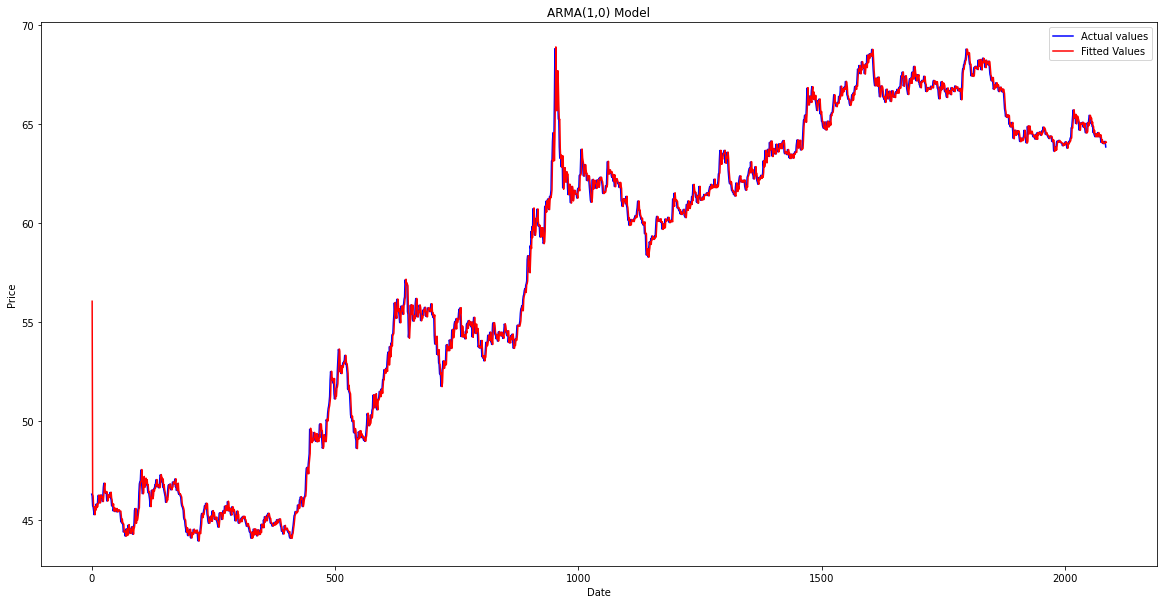

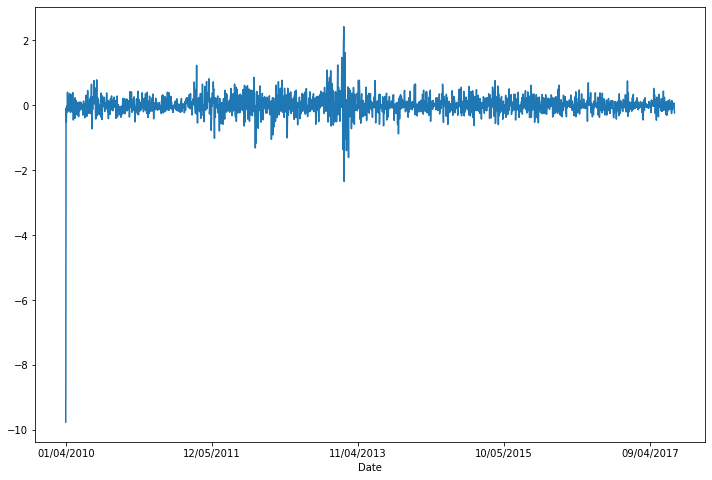

In [86]:


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = model_2.resid.plot(ax=ax);

In [92]:
## Predictions

# Next 15 days predictions

pred= model_2.forecast(steps=521)[0]
a = pd.DataFrame(pred)


In [87]:
test.shape

(521, 1)

In [189]:
from sklearn.metrics import mean_squared_error

mse_model_2 = (mean_squared_error(test['Price'],pred))

NameError: name 'pred' is not defined

In [90]:
mse_model_2

7.258184913093357

In [38]:
print(mean_squared_error(test,pred))

NameError: name 'pred' is not defined

In [201]:
## ARIMA MODEL

from statsmodels.tsa.arima_model import ARIMA

arima_1= ARIMA(train['Price'],order=(1,1,1)).fit()

/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [202]:
arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 2084
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.618
Method:                       css-mle   S.D. of innovations              0.273
Date:                Thu, 09 Dec 2021   AIC                            515.236
Time:                        11:46:17   BIC                            537.804
Sample:                    01-05-2010   HQIC                           523.505
                         - 12-29-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0084      0.006      1.352      0.176      -0.004       0.021
ar.L1.D.Price    -0.4186      0.154     -2.720      0.007      -0.720      -0.117
ma.L1.D.Price     0.4755      0.148      3.208      0.001       0.185       0.766
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3890           +0.0000j            2.3890            0.5000
MA.1           -2.1032           +0.0000j            2.1032            0.5000
-----------------------------------------------------------------------------
"""

In [198]:
arima_pred = arima_1.forecast(steps=521)[0]
b = pd.DataFrame(arima_pred)
print(b.shape,test.shape)

(521, 1) (521, 1)


In [199]:
from sklearn.metrics import mean_squared_error

mse_arima_1 = (mean_squared_error(test['Price'],b))
mse_arima_1

15.34163776471663

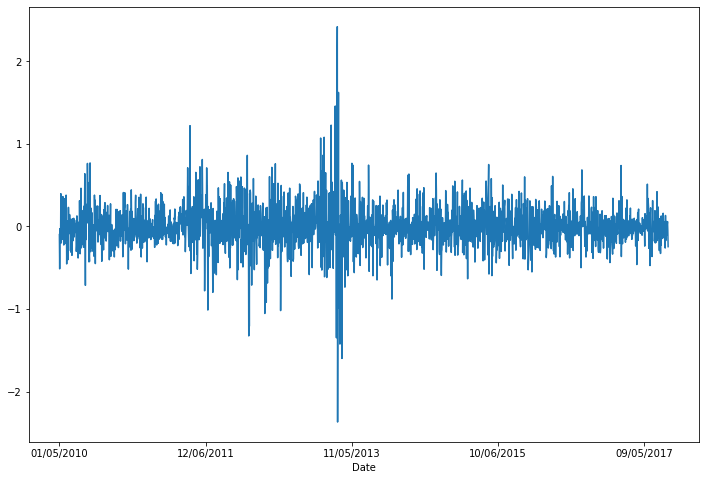

In [207]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_1.resid.plot(ax=ax);

In [84]:
test['Price'].head()

2086    63.680
2087    63.460
2088    63.505
2089    63.400
2090    63.340
Name: Price, dtype: float64

In [208]:
## ARIMA (2,1,2)

arima_2= ARIMA(train,order=(2,1,2)).fit()
arima_2.summary()
arima_2_pred = arima_2.forecast(steps=521)[0]
b_2 = pd.DataFrame(arima_2_pred)



/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [69]:
arima_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 2084
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -237.294
Method:                       css-mle   S.D. of innovations              0.271
Date:                Tue, 07 Dec 2021   AIC                            486.589
Time:                        23:56:43   BIC                            520.441
Sample:                    01-05-2010   HQIC                           498.993
                         - 12-29-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0085      0.006      1.532      0.126      -0.002       0.019
ar.L1.D.Price     0.2180      0.158      1.379      0.168      -0.092       0.528
ar.L2.D.Price    -0.5031      0.093     -5.433      0.000      -0.685      -0.322
ma.L1.D.Price    -0.1883      0.170     -1.109      0.267      -0.521       0.144
ma.L2.D.Price     0.3822      0.098      3.911      0.000       0.191       0.574
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2166           -1.3930j            1.4098           -0.2254
AR.2            0.2166           +1.3930j            1.4098            0.2254
MA.1            0.2463           -1.5986j            1.6175           -0.2257
MA.2            0.2463           +1.5986j            1.6175            0.2257
-----------------------------------------------------------------------------
"""

In [209]:
mse_arima_2 = (mean_squared_error(test,b_2))
mse_arima_2

15.053692345877709

In [73]:
## code to test the best ARIMA parameters

import itertools
p = range(1, 4)
d = range(1, 2)
q = range(1, 3)
pdq = list(itertools.product(p, d, q))
aics = []
params = []
for param in pdq:
    model = ARIMA(train, order=param)
    model_fit = model.fit()
    aic = model_fit.aic
    aics.append(aic)
    params.append(param)
combo = list(zip(aics, params))
combo.sort()
combo_array = np.array(combo)
print(combo_array)

/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

[[483.27464709415835 (3, 1, 2)]
 [486.58890572588007 (2, 1, 2)]
 [491.70123821591096 (3, 1, 1)]
 [495.2220997829527 (2, 1, 1)]
 [500.03088898288024 (1, 1, 2)]
 [515.2355561450186 (1, 1, 1)]]


/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-73-5fade7561a53>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

In [74]:
print(combo_array)

[[483.27464709415835 (3, 1, 2)]
 [486.58890572588007 (2, 1, 2)]
 [491.70123821591096 (3, 1, 1)]
 [495.2220997829527 (2, 1, 1)]
 [500.03088898288024 (1, 1, 2)]
 [515.2355561450186 (1, 1, 1)]]


In [ ]:
## ARIMA (3,1,2) shows the lowest AIC values but pvalue is <0.05 for ARIMA(1,1,1)

Text(0.5, 1.0, 'ARIMA(2,1,2) Model')

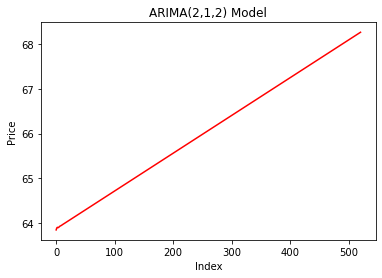

In [210]:
plt.plot(arima_2_pred, color='r')
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("ARIMA(2,1,2) Model")

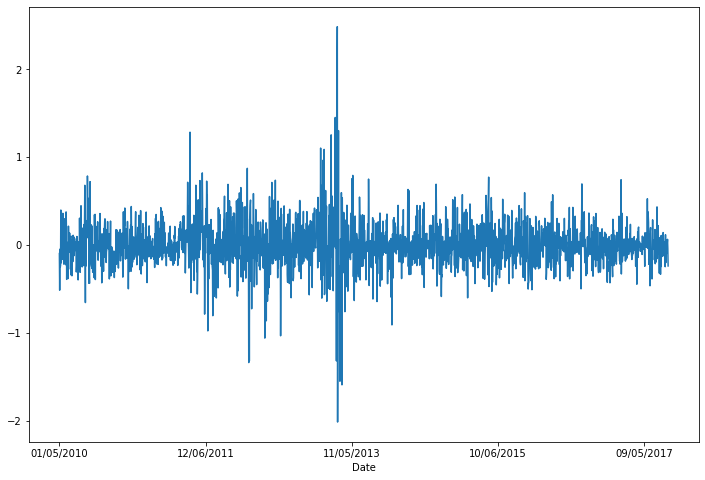

In [211]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_2.resid.plot(ax=ax);